## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [4]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [5]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [6]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
data = data.split('\n')
pic_url=[]
for i in data :
    spl2=i.split('\t')
    pic_url.append(spl2)

In [7]:
data=pd.DataFrame(pic_url,columns=['id','url'])

## 將 txt 轉成 pandas dataframe

In [8]:
import pandas as pd
    
df = pd.DataFrame(data['url'])
df.head(10)

,url
0,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...
2,http://farm1.static.flickr.com/27/51009336_a96...
3,http://farm4.static.flickr.com/3025/2444687979...
4,http://img100.imageshack.us/img100/3253/forres...
5,http://img172.imageshack.us/img172/4606/napo03...
6,http://fotootjesvanannelies.web-log.nl/olifant...
7,http://www.deweekkrant.nl/images/library/pictu...
8,http://www.porschemania.it/discus/messages/815...
9,http://farm1.static.flickr.com/72/225029238_80...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

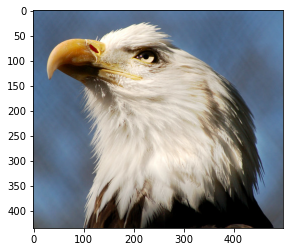

In [10]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df['url'].loc[0]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [11]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=pd.DataFrame(url_list)
    return img_list

Total images that we got: 5 


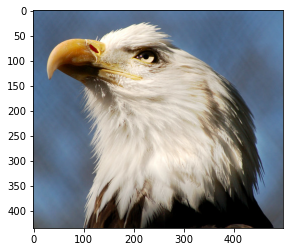

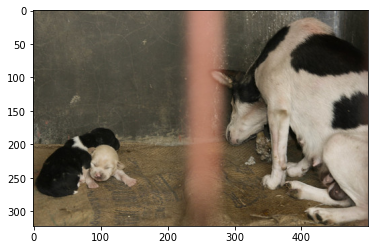

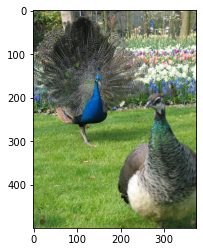

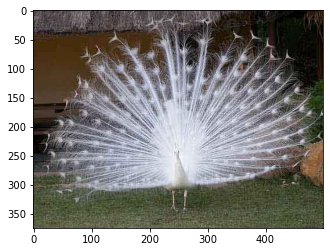

url is broke


In [13]:
result = img2arr_fromURLs(df[0:5]['url'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for i  in range(len(result)):
    try:
        im_get=result[0][i]
        response = requests.get(im_get)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()
    except OSError:
        print('url is broke')